<a href="https://colab.research.google.com/github/RockgelioAI/Actividades_Aprendizaje-/blob/main/Reto%20-%20Parte%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Curso: Ciencia y Analítica de datos**
###Tecnológico de Monterrey
###Dra. Maria de la Paz Rico Fernández

###**Parte I:**
####Limpieza, análisis, visualización y agrupamiento.

**Equipo 144:**

* José Miguel Guerrero Arias - A01793075
* Rogelio Chávez López - A01794226

In [1]:
import requests
from io import BytesIO
from zipfile import ZipFile

import numpy as np
import pandas as pd

import missingno as msno
%matplotlib inline


Cargamos el data set a análizar en este caso nos hemos enfocado en los *Datos de calidad del agua de sitios de monitoreo de aguas subterraneas*

In [107]:
url = "http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip"
df = []

with ZipFile(BytesIO(requests.get(url).content), "r") as myzip:
    with myzip.open("Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", "r") as f_in:
        df = pd.read_csv(f_in, sep=",", encoding='latin-1')

In [71]:
df.head()

,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,Alta,940.0,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,Alta,608.0,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,Alta,532.0,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,Alta,686.0,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,Alta,1841.0,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


#Análisis de los datos:

In [108]:
df.shape

(1068, 57)

Se hacen algunas consultas para conocer el formato de los datos:

In [109]:
df.dtypes 

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Se explora si hay datos nulos en el dataframe:


In [111]:
df.isnull().values.any()  

True

In [112]:
df.isnull().any() 

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

Se hace un primer análisis exploratorio de los datos de las variables númericas y categoricas:

+ Encontramos 6 varibles númericas, de las cuales 'SDT_mg/L' está completamente vacia y por otro lado 'PERIODO' que es un punico valor, con base en lo aterior se borrarán
+ Tambien se identifiacn 51 variables categoricas, dos de ellas tambien serán exlcuidas del análisis al no aportar información relevante: 'CLAVE' y 'SITIO'

In [113]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [114]:
df['SDT_mg/L']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1063   NaN
1064   NaN
1065   NaN
1066   NaN
1067   NaN
Name: SDT_mg/L, Length: 1068, dtype: float64

In [115]:
df['PERIODO']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
1063    2020
1064    2020
1065    2020
1066    2020
1067    2020
Name: PERIODO, Length: 1068, dtype: int64

In [116]:
df.describe(include='object')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,SDT_M_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1064,1062,1066,...,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,4,5,925,...,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,Alta,Permisible para riego,496,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,794,460,4,...,841,1007,985,941,1066,1053,1067,1056,982,932


La variable 'CLAVE' en reliadad corresponde a un identicador único.

In [117]:
df['CLAVE'].value_counts()/df.shape[:1]

DLAGU6         0.000936
OCGCE3209      0.000936
OCFSU2993      0.000936
OCFSU2994      0.000936
OCFSU3048      0.000936
                 ...   
DLHID6458      0.000936
DLHID6461      0.000936
DLHID6463      0.000936
DLHID6467      0.000936
OCRBR5109M1    0.000936
Name: CLAVE, Length: 1068, dtype: float64

En el caso del 'SITI0' o lugar de monitoreo por lo tanto practicamente es como un identificador único.

In [118]:
df['SITIO'].value_counts()/df.shape[:1]

EL FUERTE                           0.001873
POZO VILLA UNION                    0.001873
POZO BERRIOZABAL                    0.000936
RANCHO GIUSEPPE CONSTANZO           0.000936
QUINTA 2 POTRILLOS                  0.000936
                                      ...   
POZO SAN FRANCISCO BOJAY COLONIA    0.000936
POZO SANTA ANA AHUEHUEPAN           0.000936
POZO SANTA MARIA DAXTHO             0.000936
POZO PEDRO MARIA ANAYA              0.000936
COMUNIDAD LA REFORMA                0.000936
Name: SITIO, Length: 1066, dtype: float64

Borrado de estas cuatro variables del data frame:

In [119]:
df.drop(['CLAVE', 'SITIO', 'PERIODO', 'SDT_mg/L'], axis=1, inplace = True)

Acontinuación se efectua un analisis en cada variable del datafreme para continuar con el descarte a priori de variables que estan muy pulverizadas:


In [120]:
c_categorical=[]

In [121]:
c_numerical = ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CONDUCT_mS/cm']

c_categorical = ['ORGANISMO_DE_CUENCA', 'ESTADO',  'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'SDT_M_mg/L',
                 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 
                 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS', 
                 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 
                 'MN_TOT_mg/L', 'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES']

c_binary = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 
            'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

#c_totalcat = np.append(c_categorical,c_binary,axis = 0)

Revisión de la distribución de los valores de las varaiables categoricas:

In [122]:
for i in c_categorical:
  print('Valores  de la varibale: ', i)
  print(df[i].value_counts()/df.shape[:1])
  print("-------------------------------------------")
  print("-------------------------------------------")

Valores  de la varibale:  ORGANISMO_DE_CUENCA
CUENCAS CENTRALES DEL NORTE     0.217228
LERMA SANTIAGO PACIFICO         0.159176
PENINSULA DE YUCATAN            0.117041
NOROESTE                        0.088015
PENINSULA DE BAJA CALIFORNIA    0.083333
BALSAS                          0.064607
RIO BRAVO                       0.060861
PACIFICO NORTE                  0.058052
GOLFO NORTE                     0.049625
AGUAS DEL VALLE DE MEXICO       0.035581
FRONTERA SUR                    0.031835
GOLFO CENTRO                    0.019663
PACIFICO SUR                    0.014981
Name: ORGANISMO_DE_CUENCA, dtype: float64
-------------------------------------------
-------------------------------------------
Valores  de la varibale:  ESTADO
DURANGO                            0.113296
SONORA                             0.096442
YUCATAN                            0.079588
ZACATECAS                          0.070225
COAHUILA DE ZARAGOZA               0.055243
BAJA CALIFORNIA SUR                0.0

Revisión de la distribución de los valores de las varaiables binarias:

In [123]:
c_categorical=list(df.columns)

for i in c_binary:
  print('Valores  de la varibale: ', i)
  print(df[i].value_counts()/df.shape[:1])
  print("---------------------------------")
  print("---------------------------------")

Valores  de la varibale:  CUMPLE_CON_ALC
SI    0.941011
NO    0.055243
ND    0.003745
Name: CUMPLE_CON_ALC, dtype: float64
---------------------------------
---------------------------------
Valores  de la varibale:  CUMPLE_CON_COND
SI    0.879213
NO    0.115169
ND    0.005618
Name: CUMPLE_CON_COND, dtype: float64
---------------------------------
---------------------------------
Valores  de la varibale:  CUMPLE_CON_SDT_ra
SI    0.931648
NO    0.066479
ND    0.001873
Name: CUMPLE_CON_SDT_ra, dtype: float64
---------------------------------
---------------------------------
Valores  de la varibale:  CUMPLE_CON_SDT_salin
SI    0.931648
NO    0.066479
ND    0.001873
Name: CUMPLE_CON_SDT_salin, dtype: float64
---------------------------------
---------------------------------
Valores  de la varibale:  CUMPLE_CON_FLUO
SI    0.820225
NO    0.179775
Name: CUMPLE_CON_FLUO, dtype: float64
---------------------------------
---------------------------------
Valores  de la varibale:  CUMPLE_CON_D

#Limpieza de los datos:

Duarante los pasos anteriores se identificaron algunas temas reelavantes:

+ Hay variables con datos perdidos
+ Aun hay variables que no aportan información al concentrar sus distrunucion o en un único valor o tenerla pulverizada en muchos.
+ Hay variables númericas que tiene calores con el signo "<" por lo que parecieran del tipo string
+ Hay 15 variables binarias que se derivan de un par de variables númericas ycategoricas
+ Del punto anterior se identifica que las variables trabajan de triadas y otras en cuarteto.
+ De los puntos anteriores hay que tomar en cuenta si sé deberian imputar valores o es mejor borrar los registros con datos perdidos.

La variable 'CONTAMINANTES' es un arreglo de las variables previas y esta perfectamente categorizada en las 15 variables binarias. Al identificar cuando hay detemerminado contaminante por arriba de los umbrales recomendado hace una marca en todas las validaciones. Por ej. Floururo, NO3, CF, etc.


In [96]:
df.drop(['CONTAMINANTES'], axis=1, inplace = True)

In [97]:
df.shape                  # se revisa cuantos registros faltan vs el df original

(1068, 52)

In [98]:
df.dropna(inplace = True) # se borran los registros (filas) con datos faltantes

In [99]:
df.shape                  # se revisa cuantos registros faltan vs el df original

(1054, 52)

#Visualización de los datos:

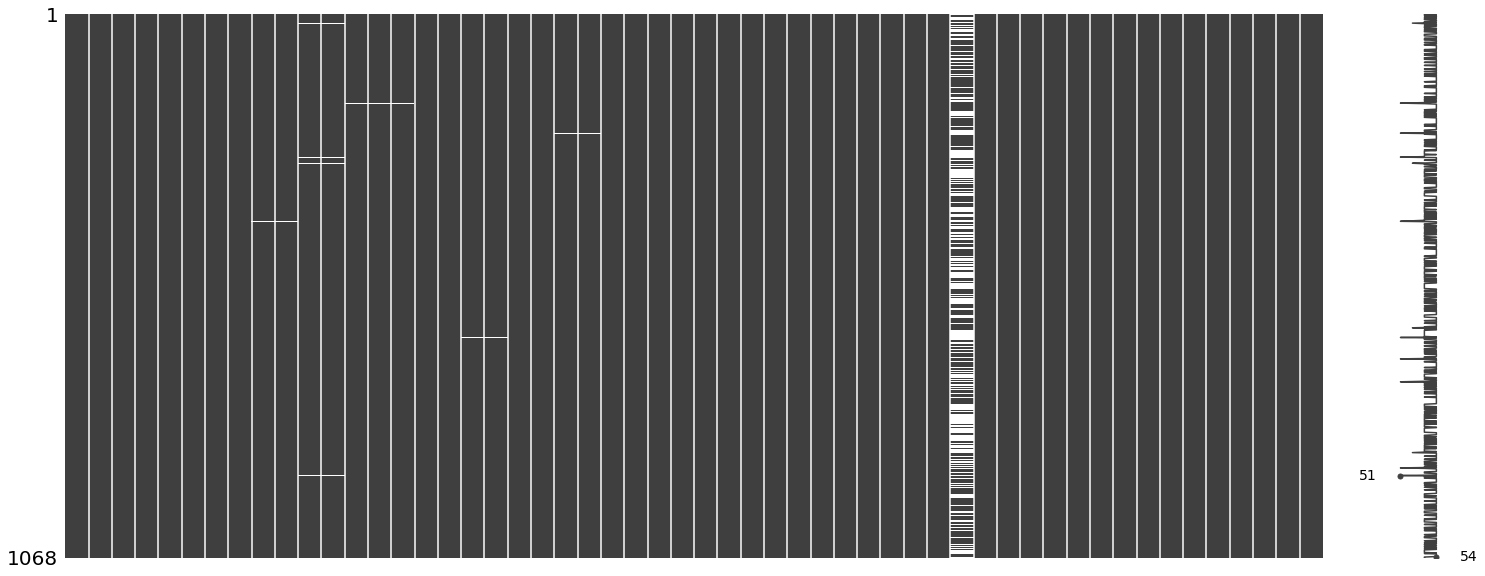

In [ ]:
msno.matrix(df)

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 35.3 MB/s 
     |████████████████████████████████| 16.7 MB 40.2 MB/s 


In [ ]:
!pip install basemap

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


# Creamos la lista de latitudes y longitudes.
lats, lons = list(df['LATITUD']), list(df['LONGITUD'])

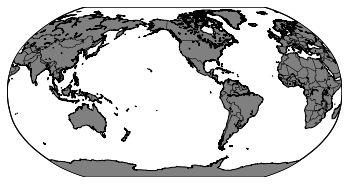

In [71]:
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
plt.show() 

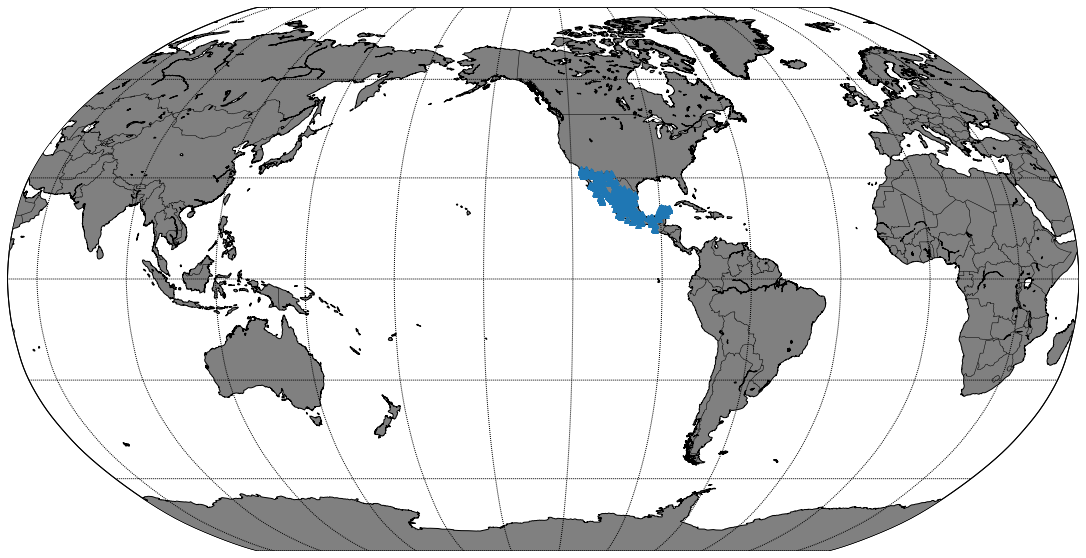

In [72]:
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

## Coordenadas a posiciones
x,y = eq_map(lons, lats)
eq_map.plot(x, y, '^', markersize=6)
 
plt.show()

#Agrupamiento de los datos: